In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [2]:
# !pip install pytrends

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv('AAPL_quarterly_financials.csv')


In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:, :]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [30]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "MacBook", "Apple CEO", "UCLA", "Recession","is the earth flat", "Apple Share"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [31]:
X = df.resample("Q").mean()

In [32]:
# fix data
temp = pd.concat([y,X],axis =1).dropna()
y = temp[['BasicEPS']].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .1. Plot a bar chart.

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso(alpha=0.1)

In [38]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [39]:
coefficients = lasso.coef_

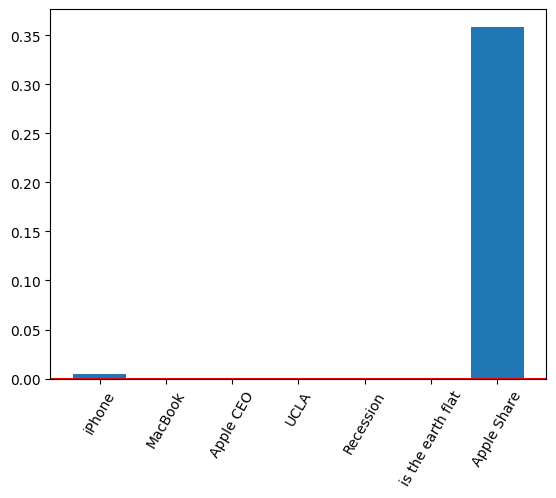

In [40]:
plt.bar(range(len(coefficients)), coefficients) 
plt.xticks(range(len(coefficients)), X.columns, rotation=60)
plt.axhline(0, color='red')
plt.show()

# 5） Does it make sense?

Yes. When building a model to predict Apple's stock price, the term "Apple Share" should be given primary importance. This is logical as "Apple Share" directly pertains to Apple's stock movements. Hence, it's sensible to regard it as the most significant explanatory variable.